<a href="https://colab.research.google.com/github/Antikadas1/Kaggle_Challenges/blob/main/Indian_Premier_League_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Link to kaggle challenge
#you can find more information about the data there 

In [146]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go

In [46]:
#mount google drive
from google.colab import drive
drive.mount("/content/MyDrive")


Mounted at /content/MyDrive


In [114]:
#define the path of my data folder inside google drive
path="/content/MyDrive/MyDrive/Dataset"
match=pd.read_csv(os.path.join(path,'matches.csv'))
delivery=pd.read_csv(os.path.join(path,'deliveries.csv'))

# Data Analysis on match.csv
##### 1) Each year how many matches were held
##### 2) Number of matches won by each team
##### 3) Number of matches won by each team at their home ground
##### 4) Which team won highest number of matches
##### 5) Does the highest number of winning matches team won the Final -- ** for that we would need one extra information that is who is the winner of each year from 2006 to 2017
##### 6) Every season which player won the highest man of the match from each team
##### 7) Do analysis if batting/fielding first has an effect on winning
##### 8) number of teams played each season
##### 9) Duration of all seasons in months

In [157]:
#create a dataframe  IPL Winners List from 2008-2017
ipl_final_winner=pd.DataFrame({"season":sorted(set(match["season"])),"winner Team":["Rajasthan Royals","Deccan Chargers","Chennai Super Kings","Chennai Super Kings","Kolkata Knight Riders","Mumbai Indians","Kolkata Knight Riders","Mumbai Indians","Sunrisers Hyderabad","Mumbai Indians"]})

In [122]:
#get some information about match csv
#get column names 
col_list_match=list(match.columns)
print (len(col_list_match))
col_list_match
#col and rows info
match

18


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [127]:
#drop unnecessary cols
match["umpire3"].isnull().sum()
match=match.drop(columns=["umpire3","dl_applied"])

#there replace Rising Pune Supergiants with Rising Pune Supergiant as they both are same team but "s" is the entry error
match.team1.replace("Rising Pune Supergiants","Rising Pune Supergiant",inplace=True)

In [128]:
match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
season_name- 2008 : count of total matches : 58
season_name- 2009 : count of total matches : 57
season_name- 2010 : count of total matches : 60
season_name- 2011 : count of total matches : 73
season_name- 2012 : count of total matches : 74
season_name- 2013 : count of total matches : 76
season_name- 2014 : count of total matches : 60
season_name- 2015 : count of total matches : 59
season_name- 2016 : count of total matches : 60
season_name- 2017 : count of total matches : 59


<BarContainer object of 10 artists>

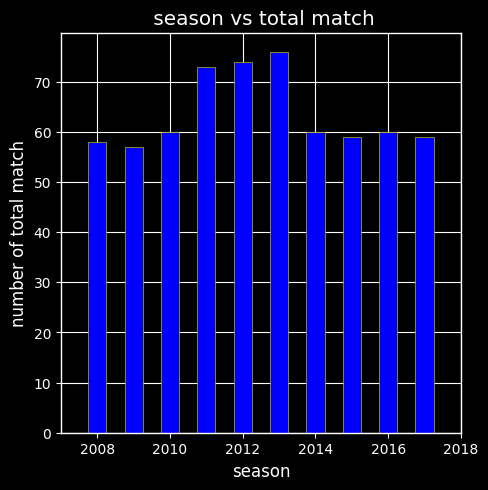

In [129]:
# 1) Each year how many matches were held -- calculation
name_unique_season=sorted(set(match["season"]))
print (name_unique_season)
count_of_total_matches=[]
for i in name_unique_season:
  count_of_total_matches.append((list(match["season"])).count(i))
  print ("season_name-",i,":","count of total matches :",(list(match["season"])).count(i))

# 1) Each year how many matches were held -- visualization
plt.style.available
plt.style.use('dark_background')
fig=plt.figure(figsize=(8,8),dpi=100)
axes=fig.add_axes([0.2,0.2,0.5,0.5])
axes.set_xlabel("season")
axes.set_ylabel("number of total match")
axes.set_title(" season vs total match")
axes.set_xlim(2007,2018)
axes.bar(name_unique_season,count_of_total_matches,color="blue",edgecolor="y",width=0.5)

In [147]:
#2) Number of matches won by each team

name_unique_season=sorted(set(match["season"]))
name_of_teams=sorted(set(match["team1"]))
#Filter out the data for each season and check Number of matches won by each team
season1=match[match["season"]==2008]
season2=match[match["season"]==2009]
season3=match[match["season"]==2010]
season4=match[match["season"]==2011]
season5=match[match["season"]==2012]
season6=match[match["season"]==2013]
season7=match[match["season"]==2014]
season8=match[match["season"]==2015]
season9=match[match["season"]==2016]
season10=match[match["season"]==2017]

def max_matches_won(name_of_teams,*arg):
  season=[]
  team_name=[]
  max_win_count=[]
  team=""
  
  for s in [season1,season2,season3,season4,season5,season6,season7,season8,season9,season10]:
    max_win=0

    for name in name_of_teams:
      number_of_wins=list(s["winner"]).count(name)
      if number_of_wins>max_win:
        max_win=number_of_wins
        season_year=str(set(list(s["season"])))
        team=name
    season.append(season_year)
    team_name.append(team)
    max_win_count.append(max_win)
  return season,team_name,max_win_count

season,team_name,max_win_count=max_matches_won(name_of_teams,season1,season2,season3,season4,season5,season6,season7,season8,season9,season10)   
      

In [148]:
season,team_name,max_win_count

(['{2008}',
  '{2009}',
  '{2010}',
  '{2011}',
  '{2012}',
  '{2013}',
  '{2014}',
  '{2015}',
  '{2016}',
  '{2017}'],
 ['Rajasthan Royals',
  'Delhi Daredevils',
  'Mumbai Indians',
  'Chennai Super Kings',
  'Kolkata Knight Riders',
  'Mumbai Indians',
  'Kings XI Punjab',
  'Chennai Super Kings',
  'Sunrisers Hyderabad',
  'Mumbai Indians'],
 [13, 10, 11, 11, 12, 13, 12, 10, 11, 12])

In [160]:
#create a table to show each season maxmimum number of wins by team
fig=go.Figure(data=[go.Table(
    header=dict(values=['season', 'team','Highest winning match count',"season winner"],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[season, # 1st column
                       team_name,# 2nd column
                       max_win_count,
                       list(ipl_final_winner["winner Team"])], #3rd column

               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=500)
fig.show()


In [145]:
season,max_win_count

(['{2008}_Rajasthan Royals',
  '{2009}_Delhi Daredevils',
  '{2010}_Mumbai Indians',
  '{2011}_Chennai Super Kings',
  '{2012}_Kolkata Knight Riders',
  '{2013}_Mumbai Indians',
  '{2014}_Kings XI Punjab',
  '{2015}_Chennai Super Kings',
  '{2016}_Sunrisers Hyderabad',
  '{2017}_Mumbai Indians'],
 [13, 10, 11, 11, 12, 13, 12, 10, 11, 12])

In [110]:
max_win_count

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]